<h1>Image Reduction using K-Mean Clustering analysis</h1>
<ul><li>
For this project, I've decided to focus on image compression. The dataset I'm utilizing includes a folder containing 800 high-resolution images, totaling 3.54 GB in size. Since the images do not require any cleaning, I wrote a Python script to extract the image information and save it into a CSV file. Additionally, I plan to use K-Means to identify the dominant colors in the images by determining the color centroids. K-Means will also be employed to group similar RGB colors together.</li>
<li style="color:#ff0000">Note: This project requires installing OpenCV that allows performing image processing</li>
</ul>
<h3>Data preparation and EDA</h3>
<div>The code below read the images from the folder "DIV2K_train_HR" and read image name, calculate image's size in disk, width and height. Then insert every image record into the "images.csv"</div>

In [1]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import csv
import pandas as pd
import cv2
from sklearn.cluster import KMeans
from skimage import io
import matplotlib as mat
from collections import Counter
from os.path import exists
#from sklearn.metrics import silhouette_score
images_folder= "DIV2K_train_HR"



#list all images in the folder DIV2K_train_HR in images as array


if not exists("images.csv"):
    images = os.listdir(images_folder)
    # csv columns' names
    fields = ['Name', 'bytes', 'width', 'height'] 
    # Create 2 dimensional array 800X4
    arr = [[0]*4 for _ in range(800)]

    #Fill array with image_name, size in bytes, width, height    
    for i in range(0,len(images)):
        arr[i][0]= images[i]
        arr[i][1]= os.stat(os.path.join(images_folder, images[i])).st_size
        img = Image.open(os.path.join(images_folder, images[i]))
        arr[i][2]= img.width
        arr[i][3]= img.height

    # name of csv file to create 
    filename = "images.csv"

    # writing to csv file 
    with open(filename, 'w') as csvfile: 
        # creating a csv writer object 
        csvwriter = csv.writer(csvfile)    
        # writing the columns name 
        csvwriter.writerow(fields) 
        # writing the array images to the file 
        csvwriter.writerows(arr)
    
df = pd.read_csv("images.csv") 
df.head()

,Name,bytes,width,height
0,0298.png,4278319,2040,1224
1,0267.png,3575617,2040,1356
2,0501.png,5109041,2040,1356
3,0515.png,6242435,2040,1356
4,0273.png,4495600,2040,1356


<h2>Analysis</h2>

<h3>Calculate the mean and standard deviation of the images size on disk</h2>

In [2]:
s = pd.Series(df["bytes"])
#print(s)
print("Images size on disk (mean)",s.mean()/1000000, "MB")
print("Images size on disk (standard deviation)", s.std()/1000000, "MB")

Images size on disk (mean) 4.4171998475 MB
Images size on disk (standard deviation) 0.9831606537526949 MB


<b><li>A boxblot displaying images actual size on disk </li></b>

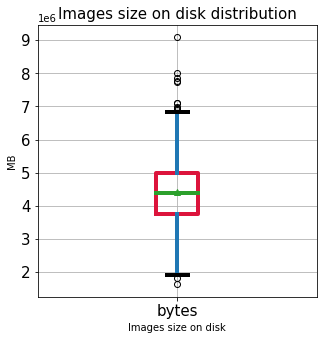

In [3]:
bp = df.boxplot(column=['bytes'],  figsize=(5,5),showfliers=True, showmeans=True,
                  return_type='dict')  

[item.set_color('crimson') for item in bp['boxes']]
# boxplot style adjustments
[[item.set_linewidth(4) for item in bp['boxes']] for key in bp.keys()]
[[item.set_linewidth(4) for item in bp['fliers']] for key in bp.keys()]
[[item.set_linewidth(4) for item in bp['medians']] for key in bp.keys()]
[[item.set_linewidth(4) for item in bp['means']] for key in bp.keys()]
[[item.set_linewidth(4) for item in bp['whiskers']] for key in bp.keys()]
[[item.set_linewidth(4) for item in bp['caps']] for key in bp.keys()]

[[item.set_color('crimson') for item in bp['boxes']] for key in bp.keys()]


# get rid of "boxplot grouped by" title
plt.suptitle("")

# label adjustment
p = plt.gca()
p.set_xlabel("Images size on disk")
p.set_ylabel("MB")
p.set_title("Images size on disk distribution", fontsize=15)
p.tick_params(axis='y', labelsize=15)
p.tick_params(axis='x', labelsize=15)

<ul><li  >The boxplot shows the maximum size on disk is over 9 MB and the minimum between 1MB and 2 MB. The mean between 4 MB and 5 MB </li></ul>

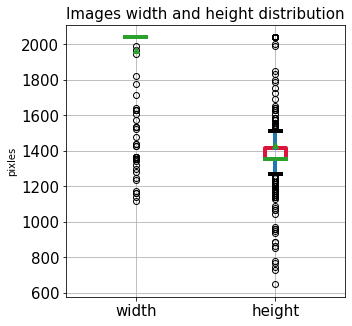

In [4]:

bp = df.boxplot(column=['width','height'],  figsize=(5,5),showfliers=True, showmeans=True,
                  return_type='dict')  

[item.set_color('crimson') for item in bp['boxes']]
# boxplot style adjustments
[[item.set_linewidth(4) for item in bp['boxes']] for key in bp.keys()]
[[item.set_linewidth(4) for item in bp['fliers']] for key in bp.keys()]
[[item.set_linewidth(4) for item in bp['medians']] for key in bp.keys()]
[[item.set_linewidth(4) for item in bp['means']] for key in bp.keys()]
[[item.set_linewidth(4) for item in bp['whiskers']] for key in bp.keys()]
[[item.set_linewidth(4) for item in bp['caps']] for key in bp.keys()]

[[item.set_color('crimson') for item in bp['boxes']] for key in bp.keys()]


# get rid of "boxplot grouped by" title
plt.suptitle("")

# label adjustment
p = plt.gca()
p.set_xlabel("")
p.set_ylabel("pixles")
p.set_title("Images width and height distribution", fontsize=15)
p.tick_params(axis='y', labelsize=15)
p.tick_params(axis='x', labelsize=15)


<ul><li >The boxplot shows the mean width is around 2000 pixels and the mean height less than 1400 pixels</li></ul>

<H5>The maximum image size shows 9.1 MB </H5>

In [5]:
max_img = df[df.bytes == df.bytes.max()]
max_img

,Name,bytes,width,height
468,0545.png,9087262,1992,2040


<H5>The minimum image size shows 1.6 MB </H5>

In [6]:
min_img = df[df.bytes == df.bytes.min()]
min_img

,Name,bytes,width,height
374,0437.png,1621531,2040,648


<h4>A blot showing the maximum size image 9.1 MB</h4>

The type of this input is <class 'numpy.ndarray'>
Shape: (2040, 1992, 3)


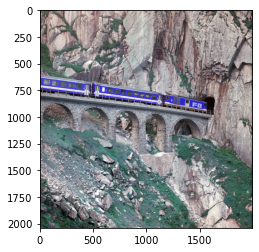

In [7]:
#print(max_img.iloc[0,0])
img = cv2.imread(os.path.join(images_folder, max_img.iloc[0,0]))
print("The type of this input is {}".format(type(img)))
print("Shape: {}".format(img.shape))

plt.imshow(img)

<b>The image is in BGR format</b>

<ul><li style="color:#ff0000"> The image's dimension is 1992 x 2040 pixels. Similarly, the img variable used to plot this image is a numpy.ndarray which is a three dimensional array (2040 x 1992 x 3). The three represent BGR colr compination. cv2.imread interprets image in BGR (Blue, Green and Red). So to switch between BGR and RGB, we need to use cvtColor function </li></ul>

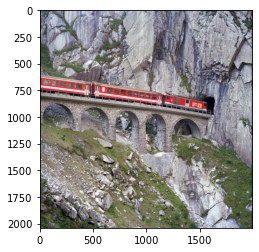

In [8]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)


<b>The image is in RGB</b>

<h5>The code below is extracting K-colors from the image, then transform the RGB extracted colors to its equivelent Hex-Color</h5>
<div>The image is very high in dimensionality (2040 x 1992 x 3), so to reduce dimensionality, I'm scaling the image by 1/5 before getting it flattened. KMean function expected a flattened array.</div> 

In [9]:
def RGB2HEX(colors):
    hex_colors = ["#{:02x}{:02x}{:02x}".format(int(colors[i][0]), int(colors[i][1]), int(colors[i][2])) for i in range(len(colors))]
    return hex_colors;


def extract_colors(image, clusters):
    img_reduced_dim = cv2.resize(image, (0,0), fx=0.5, fy=0.5) 
    #img_reduced_dim = image
    cols= img_reduced_dim.shape[0]
    rows= img_reduced_dim.shape[1]
    
    flattened_image = img_reduced_dim.reshape(cols*rows, 3)
    clf = KMeans(n_clusters =clusters)
    labels = clf.fit_predict(flattened_image)

    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    
    new_img = clf.cluster_centers_.astype("uint8")[labels]
    new_img = new_img.reshape((cols, rows, 3))
    
    
    # We get ordered colors by iterating through the keys
    rgb_colors = [center_colors[i] for i in counts.keys()]
 
    
    dict_ = {
      "RGBColors": rgb_colors,
      "color_dis": counts,
      "length": counts.keys(),
      "img":  new_img

    }
    
    return dict_

                                                                                                                      
                                                                                                                       


<li><b>Calling the extract_colors function to apply KMean clustering with K=10, and plotting the extracted colors </b></li>

<AxesSubplot:ylabel='Hex Colors'>

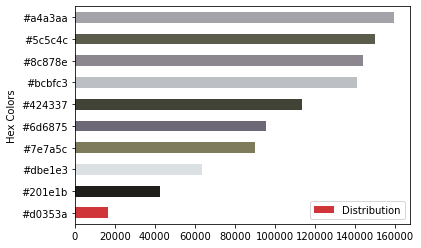

In [10]:
imgDic=extract_colors(img, 10)
hexColors= RGB2HEX(imgDic["RGBColors"])  
#colors to dataframe
colors_df = pd.DataFrame({'Hex Colors':hexColors, 'Distribution':imgDic["color_dis"].values()})
sorted_colors_df=colors_df.sort_values(by=['Distribution'])
sorted_colors_df.plot.barh(x='Hex Colors', y='Distribution', color=sorted_colors_df['Hex Colors'])

<li><b>This plot is showing the image colors distribution after using KMean with K=10 </b></li>

<div style="color:#ff0000">Plotting the new image after color reduction K=10</div>

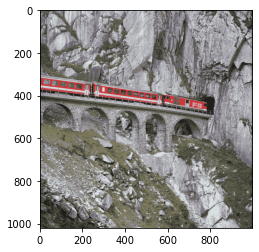

In [11]:
plt.imshow(imgDic["img"])
#mat.image.imsave('Compressed_10.jpg', imgDic["img"])

<div style="color:#ff0000">Now lets try K=5</div>

<AxesSubplot:ylabel='Hex Colors'>

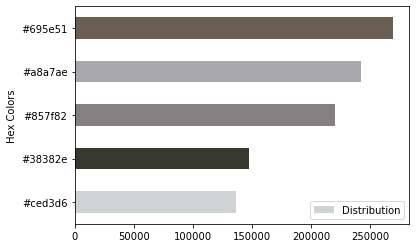

In [12]:
imgDic=extract_colors(img, 5)
hexColors= RGB2HEX(imgDic["RGBColors"])  
#colors to dataframe
colors_df = pd.DataFrame({'Hex Colors':hexColors, 'Distribution':imgDic["color_dis"].values()})
sorted_colors_df=colors_df.sort_values(by=['Distribution'])
sorted_colors_df.plot.barh(x='Hex Colors', y='Distribution', color=sorted_colors_df['Hex Colors'])

<li><b>This plot is showing the image colors distribution after using KMean with K=5 </b></li>

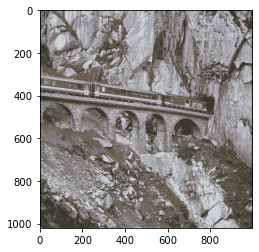

In [13]:
plt.imshow(imgDic["img"])

<div>The red color is gone, it got clustered with a different mean center point</div>

<div style="color:#ff0000">Now lets try K=15</div>

<AxesSubplot:ylabel='Hex Colors'>

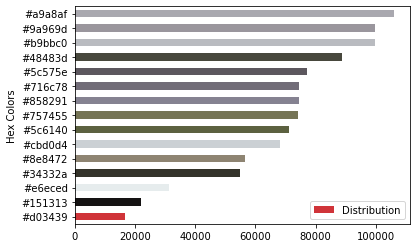

In [14]:
imgDic=extract_colors(img, 15)
hexColors= RGB2HEX(imgDic["RGBColors"])  
#colors to dataframe
colors_df = pd.DataFrame({'Hex Colors':hexColors, 'Distribution':imgDic["color_dis"].values()})
sorted_colors_df=colors_df.sort_values(by=['Distribution'])
sorted_colors_df.plot.barh(x='Hex Colors', y='Distribution', color=sorted_colors_df['Hex Colors'])

<li><b>This plot is showing the image colors distribution after using KMean with K=15 </b></li>

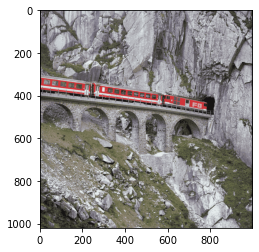

In [15]:
plt.imshow(imgDic["img"])

<ul><Li><b>A question to answer is what is a good K to use</b> <br/>
Unfortunately, Optimal K can be obtained by the elbow method. We try K with different values and calculate the SSE (Mean Squared Error) or the Inertia. Then plotting K against SSE to see what K has the elbow.</li></ul>

In [16]:
def get_SSE(image, maxK):
    inertias = []
    img_reduced_dim = cv2.resize(image, (0,0), fx=0.33, fy=0.33) 
    cols= img_reduced_dim.shape[0]
    rows= img_reduced_dim.shape[1]
    flattened_image = img_reduced_dim.reshape(cols*rows, 3)
    

    for k in range(1, maxK+1):
        kmeanModel = KMeans(n_clusters=k)
        kmeanModel.fit(flattened_image)
        inertias.append(kmeanModel.inertia_)
    return inertias


def get_SilhouetteScore(image, maxK):
    sl = []
    img_reduced_dim = cv2.resize(image, (0,0), fx=0.33, fy=0.33) 
    cols= img_reduced_dim.shape[0]
    rows= img_reduced_dim.shape[1]
    flattened_image = img_reduced_dim.reshape(cols*rows, 3)



    for k in range(2, maxK+1):
        
        clusterer = KMeans(n_clusters=k)
        preds = clusterer.fit_predict(flattened_image)
        centers = clusterer.cluster_centers_
        score = silhouette_score(flattened_image, preds)
        
        # kmeanModel = KMeans(n_clusters=k).fit(flattened_image)
        # labels = kmeanModel.labels_
        # sl_v = silhouette_score(flattened_image, labels, metric = 'euclidean')
        #print(sl_v)
        sl.append(score)
    return sl

In [17]:
sse_arr = get_SSE(img,15)
print(sse_arr)

[3846391084.038047, 1267162376.2522001, 786356930.3101671, 562557056.9395254, 454280035.73547167, 354489796.179358, 288342772.29505336, 247730485.2869635, 220709623.51439285, 199291731.94518393, 180067857.24242643, 166515396.57326332, 154460340.24315488, 144751681.48680794, 136115530.34496734]


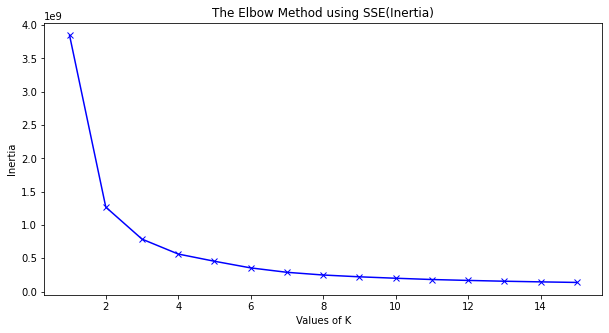

In [18]:

plt.figure(figsize=(10,5)) 
plt.plot(range(1, len(sse_arr) + 1), sse_arr, 'bx-')

plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using SSE(Inertia)')
plt.show()


<b>The elbow looks ambiguous. Even using k=2 will generate an image with two colors only</b>

<AxesSubplot:ylabel='Hex Colors'>

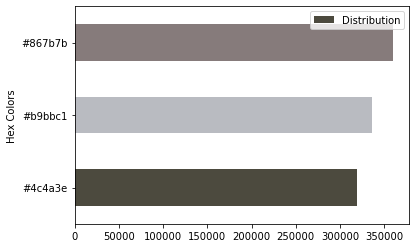

In [19]:
imgDic=extract_colors(img, 3)
hexColors= RGB2HEX(imgDic["RGBColors"])  
#colors to dataframe
colors_df = pd.DataFrame({'Hex Colors':hexColors, 'Distribution':imgDic["color_dis"].values()})
sorted_colors_df=colors_df.sort_values(by=['Distribution'])
sorted_colors_df.plot.barh(x='Hex Colors', y='Distribution', color=sorted_colors_df['Hex Colors'])

<li><b>This plot is showing the image colors distribution after using KMean with K=3 </b></li>

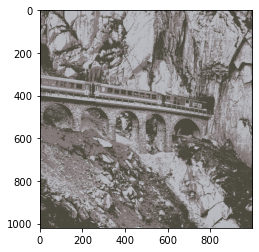

In [20]:
plt.imshow(imgDic["img"])

<b>The image after applying K=3</b>

<li style="color:#ff0000">Apply the same technique to the minimum image in size MB using K=15</li>

<AxesSubplot:ylabel='Hex Colors'>

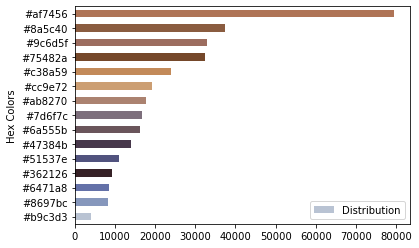

In [21]:
img = cv2.imread(os.path.join(images_folder, min_img.iloc[0,0]))
imgDic=extract_colors(img, 15)
hexColors= RGB2HEX(imgDic["RGBColors"])  
#colors to dataframe
colors_df = pd.DataFrame({'Hex Colors':hexColors, 'Distribution':imgDic["color_dis"].values()})
sorted_colors_df=colors_df.sort_values(by=['Distribution'])
sorted_colors_df.plot.barh(x='Hex Colors', y='Distribution', color=sorted_colors_df['Hex Colors'])


<li><b>This plot is showing the image colors distribution after using KMean with K=15 </b></li>

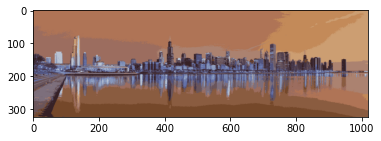

In [22]:
plt.imshow(imgDic["img"])

<li><b>This plot is showing the image colors distribution after using KMean with K=15 </b></li>

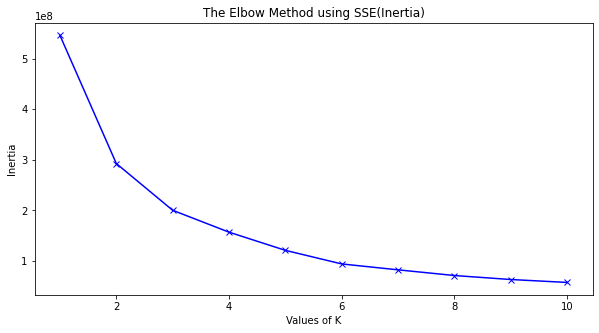

In [23]:
sse_arr = get_SSE(img,10)
plt.figure(figsize=(10,5)) 
plt.plot(range(1, len(sse_arr) + 1), sse_arr, 'bx-')

plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using SSE(Inertia)')
plt.show()

<b>The elbow looks ambiguous k between 1 and 10</b></li>

<H3>Apply K=3</H3>

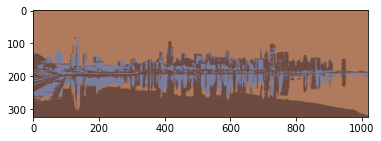

In [24]:
imgDic=extract_colors(img, 3)
plt.imshow(imgDic["img"])

<li><b>This plot is showing the image colors distribution after using KMean with K=3 according to the elbow method </b></li>

<h5 style="color:#ff0000;">Apply the algorithm to all images using K=8</h5>

In [25]:
new_images_folder="Compressed_imgs"
if not exists("images2.csv"):
    for index, row in df.iterrows():
        img =""
        img = cv2.imread(os.path.join(images_folder, row["Name"]))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        imgDic=extract_colors(img, 10)
        mat.image.imsave(os.path.join(new_images_folder, row["Name"]), imgDic["img"])

<h5 style="color:#ff0000;">Reading the compressed images</h5>

In [26]:
if not exists("images2.csv"):
    images = os.listdir(new_images_folder)
    # csv columns' names
    fields = ['Name', 'bytes', 'width', 'height'] 
    # Create 2 dimensional array 800X4
    arr = [[0]*4 for _ in range(800)]

    #Fill array with image_name, size in bytes, width, height    
    for i in range(0,len(images)):
        arr[i][0]= images[i]
        arr[i][1]= os.stat(os.path.join(new_images_folder, images[i])).st_size
        img = Image.open(os.path.join(new_images_folder, images[i]))
        arr[i][2]= img.width
        arr[i][3]= img.height

    # name of csv file to create 
    filename = "images2.csv"

    # writing to csv file 
    with open(filename, 'w') as csvfile: 
        # creating a csv writer object 
        csvwriter = csv.writer(csvfile)    
        # writing the columns name 
        csvwriter.writerow(fields) 
        # writing the array images to the file 
        csvwriter.writerows(arr)
    
df2 = pd.read_csv("images2.csv") 
df2.head()

,Name,bytes,width,height
0,0298.png,282333,1020,612
1,0267.png,111079,1020,678
2,0501.png,341840,1020,678
3,0515.png,472828,1020,678
4,0273.png,335324,1020,678


<b>The compressed images dataset.</b>

In [27]:
s = pd.Series(df2["bytes"])
#print(s)
print("Images size on disk (mean)",s.mean()/1000000, "MB")
print("Images size on disk (standard deviation)", s.std()/1000000, "MB")

Images size on disk (mean) 0.2310476775 MB
Images size on disk (standard deviation) 0.09947932163754099 MB


<h5 style="color:#ff0000;">Creating a new dataframe with the old and new size on disk</h5>

In [28]:
com = pd.DataFrame({'Name':df["Name"], 'bytes_old':df["bytes"], 'bytes_new':df2["bytes"], 'width_old':df["width"], 'width_new':df2["width"], 'height_old':df["height"], 'height_new':df2["height"] })
com.head()

,Name,bytes_old,bytes_new,width_old,width_new,height_old,height_new
0,0298.png,4278319,282333,2040,1020,1224,612
1,0267.png,3575617,111079,2040,1020,1356,678
2,0501.png,5109041,341840,2040,1020,1356,678
3,0515.png,6242435,472828,2040,1020,1356,678
4,0273.png,4495600,335324,2040,1020,1356,678


<b>Merged dataset the old and the new dimensions</b>

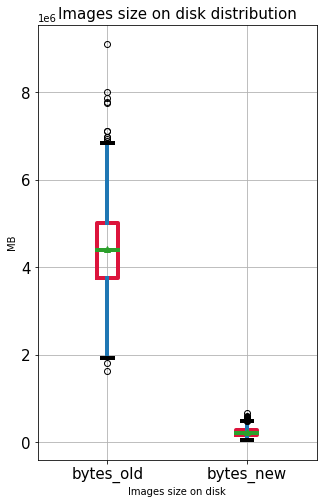

In [29]:
bp = com.boxplot(column=['bytes_old', 'bytes_new'],  figsize=(5,8),showfliers=True, showmeans=True,
                  return_type='dict')  

[item.set_color('crimson') for item in bp['boxes']]
# boxplot style adjustments
[[item.set_linewidth(4) for item in bp['boxes']] for key in bp.keys()]
[[item.set_linewidth(4) for item in bp['fliers']] for key in bp.keys()]
[[item.set_linewidth(4) for item in bp['medians']] for key in bp.keys()]
[[item.set_linewidth(4) for item in bp['means']] for key in bp.keys()]
[[item.set_linewidth(4) for item in bp['whiskers']] for key in bp.keys()]
[[item.set_linewidth(4) for item in bp['caps']] for key in bp.keys()]

[[item.set_color('crimson') for item in bp['boxes']] for key in bp.keys()]


# get rid of "boxplot grouped by" title
plt.suptitle("")

# label adjustment
p = plt.gca()
p.set_xlabel("Images size on disk")
p.set_ylabel("MB")
p.set_title("Images size on disk distribution", fontsize=15)
p.tick_params(axis='y', labelsize=15)
p.tick_params(axis='x', labelsize=15)

<ul><li><b>The boxplot shows images size on disk original size vs. the size after applying KMean with K=8</b> </li></ul>

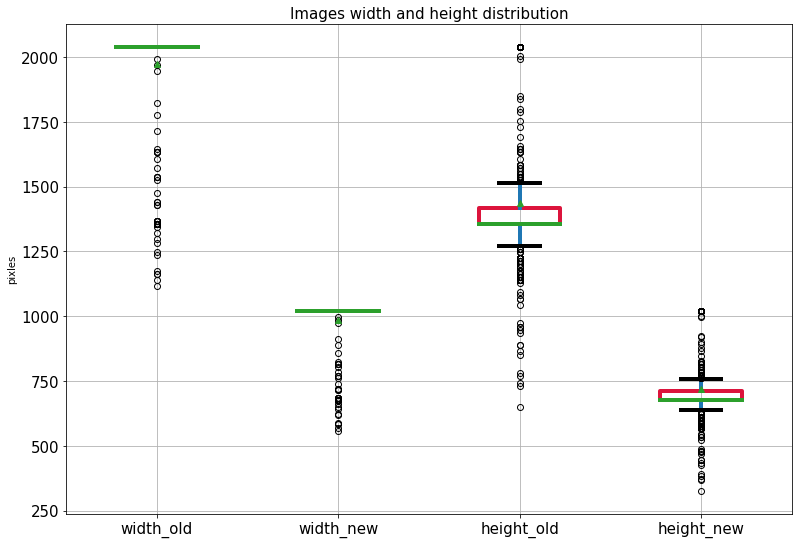

In [30]:
bp = com.boxplot(column=['width_old', 'width_new' ,'height_old', 'height_new'],  figsize=(13,9),showfliers=True, showmeans=True,
                  return_type='dict')  

[item.set_color('crimson') for item in bp['boxes']]
# boxplot style adjustments
[[item.set_linewidth(4) for item in bp['boxes']] for key in bp.keys()]
[[item.set_linewidth(4) for item in bp['fliers']] for key in bp.keys()]
[[item.set_linewidth(4) for item in bp['medians']] for key in bp.keys()]
[[item.set_linewidth(4) for item in bp['means']] for key in bp.keys()]
[[item.set_linewidth(4) for item in bp['whiskers']] for key in bp.keys()]
[[item.set_linewidth(4) for item in bp['caps']] for key in bp.keys()]

[[item.set_color('crimson') for item in bp['boxes']] for key in bp.keys()]


# get rid of "boxplot grouped by" title
plt.suptitle("")

# label adjustment
p = plt.gca()
p.set_xlabel("")
p.set_ylabel("pixles")
p.set_title("Images width and height distribution", fontsize=15)
p.tick_params(axis='y', labelsize=15)
p.tick_params(axis='x', labelsize=15)

Text(0, 0.5, 'Bytes')

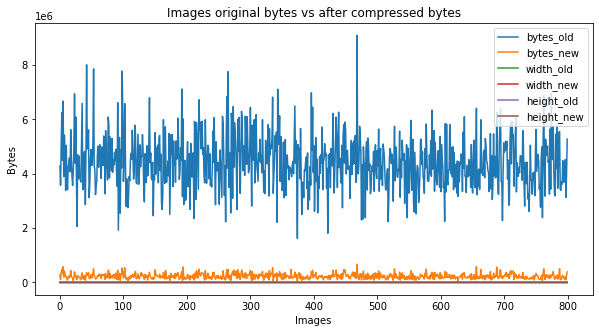

In [31]:

lines = com.plot.line(title='Images original bytes vs after compressed bytes', figsize=(10, 5))

lines.set_xlabel("Images")
lines.set_ylabel("Bytes")

<b>Line plot visualizes images sizes on disk the blue is original images, the orange after compression</b>

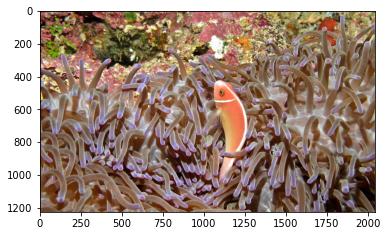

In [32]:
img = cv2.imread(os.path.join(images_folder, "0298.png")) 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)




<b>Size on disk 4.2 MB</b>

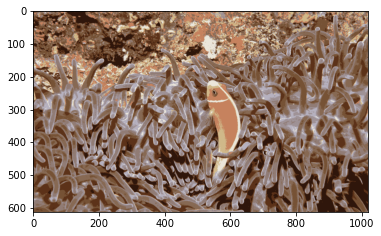

In [33]:
img = cv2.imread(os.path.join(new_images_folder, "0298.png")) 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

<b>Size on disk 282 KB</b>

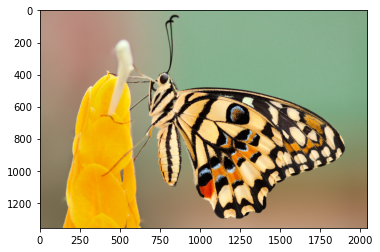

In [34]:
img = cv2.imread(os.path.join(images_folder, "0267.png")) 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

<b>Size on disk 1.1 MB</b>

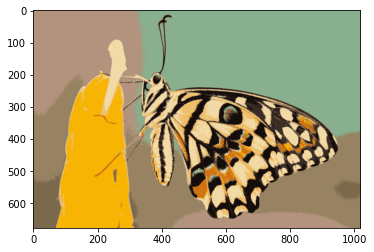

In [35]:
img = cv2.imread(os.path.join(new_images_folder, "0267.png")) 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

<b>Size on disk 111 KB</b>

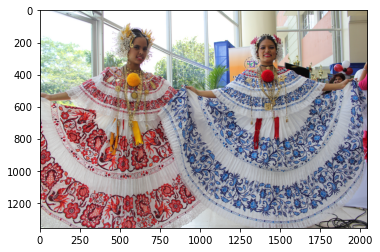

In [36]:
img = cv2.imread(os.path.join(images_folder, "0501.png")) 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

<b>Size on disk 5.1 MB</b>

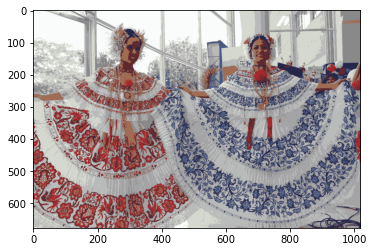

In [37]:
img = cv2.imread(os.path.join(new_images_folder, "0501.png")) 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

<b>Size on disk 341 KB</b>

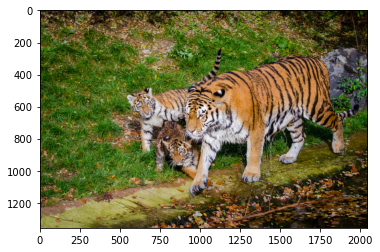

In [38]:
img = cv2.imread(os.path.join(images_folder, "0515.png")) 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

<b>Size on disk 6.2 MB</b>

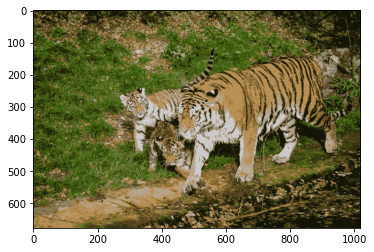

In [39]:
img = cv2.imread(os.path.join(new_images_folder, "0515.png")) 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

<b>Size on disk 472 KB</b>

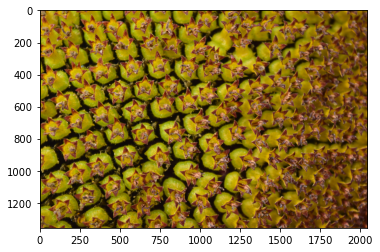

In [40]:
img = cv2.imread(os.path.join(images_folder, "0273.png")) 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

<b>Size on disk 4.5 MB</b>

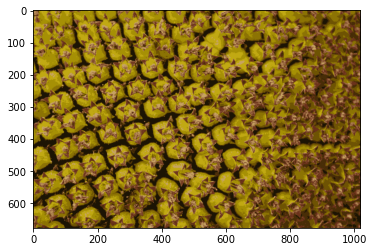

In [41]:
img = cv2.imread(os.path.join(new_images_folder, "0273.png")) 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

<b>Size on disk 335 KB</b>